# API

### Setup

In [1]:
%load_ext autoreload
%autoreload 2

from waze import Waze, Coordinate, Countries

# initialize the client
waze = Waze(locale=Countries.MY, log_level="verbose")

# example inputs

# SG
star_vista = Coordinate(name="Star Vista", latitude=1.3068, longitude=103.7884)
tuas = Coordinate(name="Tuas Checkpoint", latitude=1.336450, longitude=103.647072)

# MY
kajang = Coordinate(name="Kajang", latitude=2.993518, longitude=101.787407)
georgetown = Coordinate(name="Georgetown", latitude=5.416393, longitude=100.332680)
subang_parade = Coordinate(name="Subang Parade", latitude=3.0815, longitude=101.5851)

### Traffic

In [2]:
plan = waze.plan(src=star_vista, dst=subang_parade)

[INFO] [plan] Making request with the following parameters:
{'from': {'name': 'Star Vista', 'y': 1.3068, 'x': 103.7884}, 'to': {'name': 'Subang Parade', 'y': 3.0815, 'x': 101.5851}, 'nPaths': 1, 'useCase': 'LIVEMAP_PLANNING', 'interval': 100, 'arriveAt': True}


In [3]:
hr = plan.totalSeconds / 60 / 60
distance = plan.totalLength / 1000

print(f"Route: {plan.src.name} => {plan.dst.name} , {plan.routeName}")
print(f"Distance: {distance} km")
print(f"Estimated Travel Time: {int(hr)} hours and {(hr - int(hr)) * 60:.0f} minutes")
print(f"Toll : {plan.isToll}")
print(f"Fastest Route: {plan.isFastest}")
print(f"Toll Price : RM{plan.tollPriceInfo.tollPrice}")

('Route: Star Vista => Subang Parade , E2 Lebuhraya Utara Selatan Simpang '
 'Renggam')
'Distance: 368.834 km'
'Estimated Travel Time: 4 hours and 4 minutes'
'Toll : True'
'Fastest Route: True'
'Toll Price : RM44.59'


### Geocoding

Setting a locale when initializing the `Waze` object is necessary for this feature.  

A bounding box around the `locale` will be computed, where priority in search will be given for places within the bounding box.

In [2]:
locs = waze.geocode("McDonalds Bukit Bintang")
locs

[INFO] Locale set to name=None latitude=4.210484 longitude=101.975766
[INFO] [geocode] Making request with the following parameters:
{'q': 'McDonalds Bukit Bintang', 'v': '4.0535228,101.81838;4.3674452,102.133152', 'exp': '8,10,12', 'lang': 'en'}


[WazeLocation(address='Jalan Bukit Bintang, Kuala Lumpur', cleanName="McDonald's Bukit Bintang", latLng=Coordinate(name=None, latitude=3.1467872, longitude=101.7109909), name="McDonald's Bukit Bintang", venueId='venues.66650143.666566971.5216490'),
 WazeLocation(address='Bukit Bintang St, Imbi, Kuala Lumpur', cleanName='McDonald’s Shell Bukit Bintang', latLng=Coordinate(name=None, latitude=3.1474121, longitude=101.71781399999999), name='McDonald’s Shell Bukit Bintang', venueId='venues.66650143.666632507.36147275')]

### Venue Information

In [4]:
# from the above example
loc = locs[0]
venue = waze.venue(loc)
venue

WazeVenue(geoEnv='row', latLng=Coordinate(name=None, latitude=3.146787158, longitude=101.710990934), id='venues.66650143.666566971.5216490', address=WazeVenueAddress(countryCode='MY', countryName='Malaysia', state=None, city='Kuala Lumpur', cityId=55948, street='Jalan Bukit Bintang', streetId=11135430, segmentId=250613158, houseNumber=120), name="McDonald's Bukit Bintang", phone=WazeVenueLink(href='tel:03-2142 7843', text='03-2142 7843'), url=WazeVenueLink(href='https://www.mcdonalds.com.my', text='https://www.mcdonalds.com.my'), services=['wi_fi', 'credit_cards', 'take_away', 'restrooms', 'air_conditioning'], lastUpdateDate=1713105237751, creationDate=1429806218670, images=[WazeVenueImage(id='aa83038f-3ca5-4156-a7e1-818d0d963d61', src=ImageType(small='https://venue-image.waze.com/thumbs/thumb100_aa83038f-3ca5-4156-a7e1-818d0d963d61', large='https://venue-image.waze.com/thumbs/thumb700_aa83038f-3ca5-4156-a7e1-818d0d963d61'))], hours=[WazeVenueHours(day=0, from_=TimeUnit(hours=0, minute

In [9]:
reviews = waze.reviews(venue)
reviews

WazeReview(reviews=[Review(author_name='Киса Фиса', author_url='https://www.google.com/maps/contrib/110466187123756662079', profile_photo_url='https://lh3.googleusercontent.com/a-/ALV-UjXcbl4aovl2NhrzLWLuQo6jZPq5HBUkrIywi55oMc8eew3Xz-hy', rating=60, relative_time_description='', text='Я заказала еду и села ожидать на втором этаже.\nЖдала заказ около 10-15 минут.\nОни принесли мой заказ без картошки.\nПро то, что я заказывала картошку они забыли.\nЯ была вынуждена идти на первый этаж и разбираться.\nВ итоге картошку мне отдали.\nЗдесь картофель фри ужасный, невкусный, старый, мягкий и дряблый.\nНаггетсы вкусные.\nА бургер слишком маленький.', time=1712922177577), Review(author_name='The Choobs', author_url='https://www.google.com/maps/contrib/114512072926621795365', profile_photo_url='https://lh3.googleusercontent.com/a-/ALV-UjUyxJ5VhIitpOp9k-tUEyCn-qt8Jp21jAOnLOQZ9E4rxoBiiS1b', rating=80, relative_time_description='', text="This has to be the busiest Mackers in Malaysia. You'll average

# More Examples

### **[Extras]** Visualizing Routes

With a sufficiently large dataset, we can do cool things like

- show how the optimal/fastest route changes over time
- plot hot spots of reported incidents/accidents along popular routes via polygon counting or k-means clustering


In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

geom = gpd.read_file(
    "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/administrative_1_state.geojson"
).query("state != 'Sarawak' and state != 'Sabah' and state != 'W.P. Labuan'")

Text(101.5851, 3.0815, 'Subang Parade')

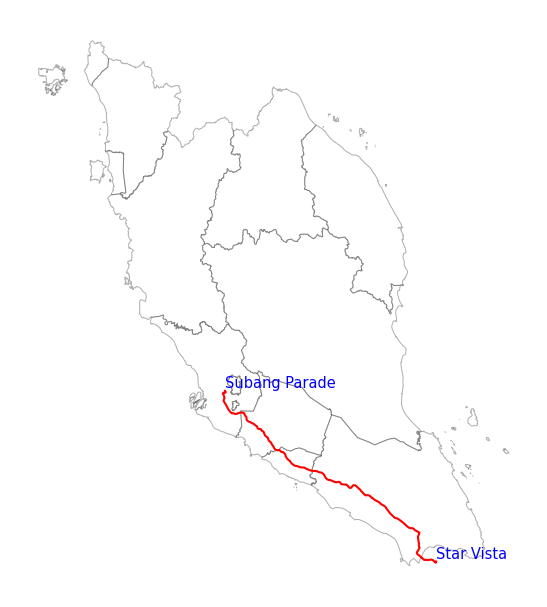

In [48]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
ax.axis("off")

route = LineString([[o.latitude, o.longitude] for o in plan.geoPath])

TEXT_DISPLAY_KWARGS = dict(
    ha="left",
    va="bottom",
    fontsize=7,
    color="blue",
)

geom.plot(ax=ax, edgecolor="black", color="white", linewidth=0.5, alpha=0.3)
ax.plot(*route.xy[::-1], color="red", linewidth=1)
ax.text(plan.src.longitude, plan.src.latitude, plan.src.name, **TEXT_DISPLAY_KWARGS)
ax.text(plan.dst.longitude, plan.dst.latitude, plan.dst.name, **TEXT_DISPLAY_KWARGS)